In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [66]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [67]:
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [68]:
dataset.shape

(399, 5)

In [69]:
dataset1 = dataset.drop(['User ID', 'Gender'], axis = 1)

In [70]:
dataset1.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [71]:
x = dataset1.iloc[:, 0:2]

In [72]:
x.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [73]:
y = dataset1['Purchased']

In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [75]:
dataset1.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [76]:
dataset1.describe()

Age  EstimatedSalary   Purchased
count  399.000000       399.000000  399.000000
mean    37.629073     69588.972431    0.355890
std     10.483189     34001.056423    0.479383
min     18.000000     15000.000000    0.000000
25%     29.500000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     87500.000000    1.000000
max     60.000000    150000.000000    1.000000

In [77]:
# Data spliting for training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [78]:
# Standardize the data

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [79]:
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
y_pred = clf.predict(x_test)

In [81]:
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[66  4]
 [ 3 27]]


In [82]:
print('Accuracy score: %f' %(accuracy_score(y_test, y_pred) * 100))

Accuracy score: 93.000000


In [83]:
print('Recall Score: ', recall_score(y_test, y_pred))

Recall Score:  0.9


In [84]:
print('Precision score: ', precision_score(y_test, y_pred))

Precision score:  0.8709677419354839


In [85]:
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred))

ROC AUC Score:  0.9214285714285714


In [86]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.87      0.90      0.89        30

    accuracy                           0.93       100
   macro avg       0.91      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


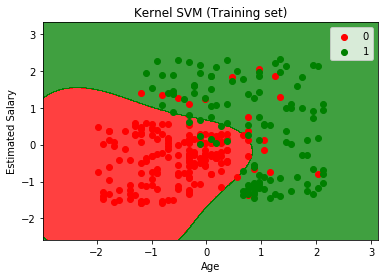

In [89]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()